### MRI reconstruction introductory notebook for ISBI 2019 tutorial

This jupyter notebook is in a directory with other notebooks
that demonstrate MRI reconstruction using the Julia language
and the Michigan Image Reconstruction Toolbox (MIRT).

2019-03-14 Jeff Fessler, University of Michigan

### Initial steps

* Install Julia (1.1 or later) from https://julialang.org/
* Explore the extensive documentation at https://docs.julialang.org/en/v1.1/
* Launch Julia and use the `]` key to enter its package manager.
* Add any packages needed for these notebooks using the `add` command.
* For example `add Plots` to add the `Plots` package.
* Other crucial standard packages are `FFTW` `FFTViews`
* You will also need the package `IJulia` to run any of these demo notebooks.
* Add MIRT by typing `add https://github.com/JeffFessler/MIRT.jl`
* After you are done adding packages, press the backspace key to return to the REPL prompt.
* Later if you need to add more packages just type the `]` key again at the REPL prompt to return to the package manager.
* Julia is under active development so code is updated frequently.  It is a wise to type `up` (short for `update`) at the package manager prompt every week or so to get automatic updates of any packages you have intalled.
* For some Julia tutorials see
http://web.eecs.umich.edu/~fessler/course/551/julia/tutor/
* For some signal processing demos in Julia see
http://web.eecs.umich.edu/~fessler/course/551/julia/demo/

### Test your installation

The next cell loads the packages needed for this initial test.
It might take a little bit of time to run the first time you try it because Julia is essentially a compiled language under the hood, even though it feels like an interactive language to the user, so it will be compiling things behind the scenes.

In [1]:
# load all packages needed for this demo 
using MIRT # https://github.com/JeffFessler/MIRT.jl
using FFTW

### View the Shepp-Logan image and its spectrum
The `ellipse_im` function in MIRT can generate phantom images consisting of ellipses such as the Shepp-Logan image.

The `jim` function in MIRT is a jiffy image display routine.

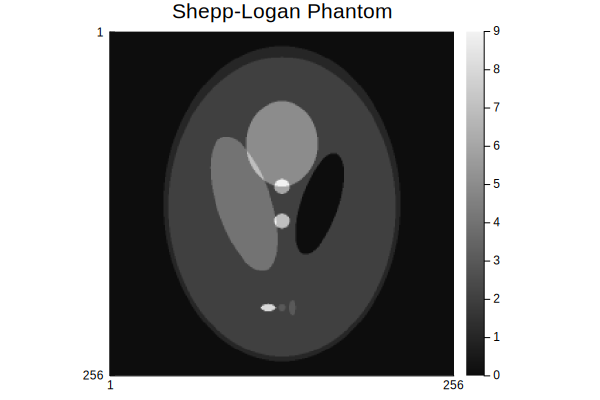

In [2]:
image = ellipse_im(256, oversample=2)
jim(image, "Shepp-Logan Phantom")

┌ Warning: magnitude
└ @ MIRT /Volumes/s0/Users/fessler/.julia/packages/MIRT/vl0h7/src/plot/jim.jl:62


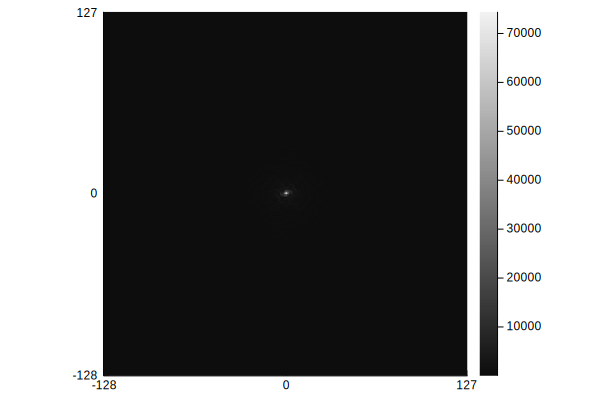

In [3]:
# calculate k-space data using fft
kspace = fft(image) # this is a 2D FFT because image is a 2D array

jim(kspace, fft0=true) # show k-space with 0 at center, ala matlab's "fftshift"

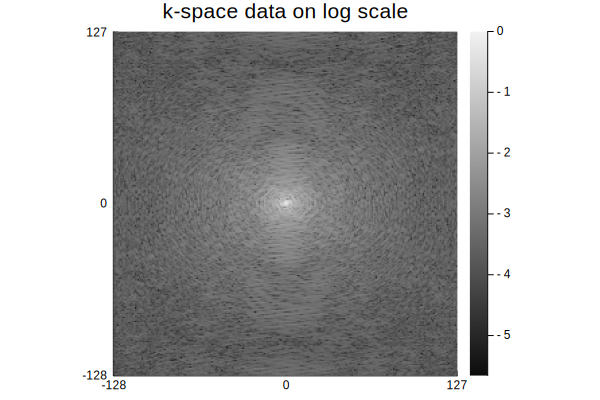

In [4]:
# it's hard to see much on a linear scale, so let's use a log scale
logger = (x;min=-6) -> log10.(max.(abs.(x) / maximum(abs.(x)), (10.)^min))
jim(logger(kspace), "k-space data on log scale", fft0=true)

### Getting help
In addition to the documentation linked above,
to learn about any command in Julia just type `?` followed by the command name
and Julia will return the documention string
that goes with that command.
Here is an example.
This example illustrates the very useful "multiple dispatch" feature of Julia;
essentially there are multiple versions of this function
that you can call in several different ways with different argument combinations,
and with optimal keyword arguments.

In [5]:
?jim

search: jim



`jim(z, ...)`

jiffy image display of `x` using `heatmap`

in

  * `z` image, can be 2D or higher, if higher then it uses `mosaicviews`

option

  * `aspect_ratio` for heatmap; default `:equal`
  * `clim` for heatmap; default `(minimum(z),maximum(z))`
  * `color` colormap; default `:grays`
  * `ncol` for mosaicview for 3D and higher arrays; default `0` does auto select
  * `padval` padding value for mosaic view; default `(minimum(z)`
  * `fft0` if true use FFTView to display; default false
  * `title` for heatmap; default `""`
  * `xlabel` for heatmap; default `""`
  * `ylabel` for heatmap; default `""`
  * `yflip` for heatmap; default `true` if minimum(y) >= 0
  * `x` for x axis; default `1:size(z,1)`
  * `y` for y axis; default `1:size(z,2)`
  * `xtick` for heatmap; default `[minimum(x),maximum(x)]`
  * `ytick` for heatmap; default `[minimum(y),maximum(y)]`

out

  * returns plot handle

2019-02-23 Jeff Fessler, University of Michigan

---

`jim(z, title; kwargs...)`

---

`jim(x, y, z; kwargs...)`

---

`jim(x, y, z, title; kwargs...)`

---

`jim(abswarn=false)`

---

`jim(:test)`


### End of introduction!

If you got this far you are ready for more interesting demos next.